In [1]:
import numpy as np

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])

/Users/pran/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import gzip, cPickle

In [4]:
name = 'ConvARC_VERIF_omniglot_standard_small_deep_attn_CARC.mtd'
f = gzip.open('results/' + name,'rb')
mtd = cPickle.load(f)
f.close()

In [5]:
print [ (key, mtd[key]) for key in ['testing',
                                    'dataset',
 'lstm_states',
 'expt_name',
 'attn_win',
 'testing_loss',
 'fg_bias_init',
 'num_param',
 'wrn_depth',
 'learning_rate',
 'n_iter',
 'dropout',
 'batch_size',
 'glimpses',
 'within_alphabet',
 'image_size',
 'wrn_width',
 'num_output',
]]

[('testing', True), ('dataset', 'omniglot'), ('lstm_states', 256), ('expt_name', 'ConvARC_VERIF_omniglot_standard_small_deep_attn_CARC'), ('attn_win', 4), ('testing_loss', 0.20131525137392112), ('fg_bias_init', 0.2), ('num_param', 1720177), ('wrn_depth', 3), ('learning_rate', 0.0001), ('n_iter', 1000000), ('dropout', 0.2), ('batch_size', 128), ('glimpses', 8), ('within_alphabet', True), ('image_size', 32), ('wrn_width', 2), ('num_output', 2)]


In [6]:
def smoothify(L, mom=0.99):
    sL = [0.6932]
    for i in range(len(L)):
        smooth_loss = mom * sL[-1] + (1 - mom) * L[i]
        sL.append(smooth_loss)
    return sL[1:]

<IPython.core.display.Javascript object>


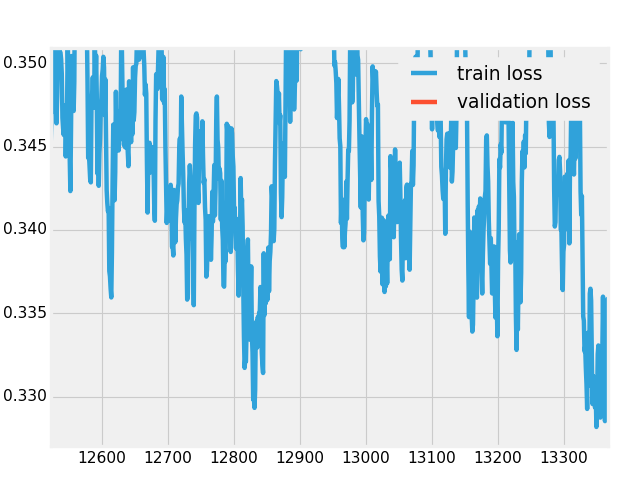

In [13]:
plt.figure(1)
training_loss = np.array(mtd["training_loss"])
plt.plot(training_loss[:, 0], smoothify(training_loss[:, 1], 0.95), label="train loss")

validation_loss = np.array(mtd["validation_loss"])
plt.plot(validation_loss[:, 0], validation_loss[:, 1], label="validation loss")
plt.legend()

<IPython.core.display.Javascript object>


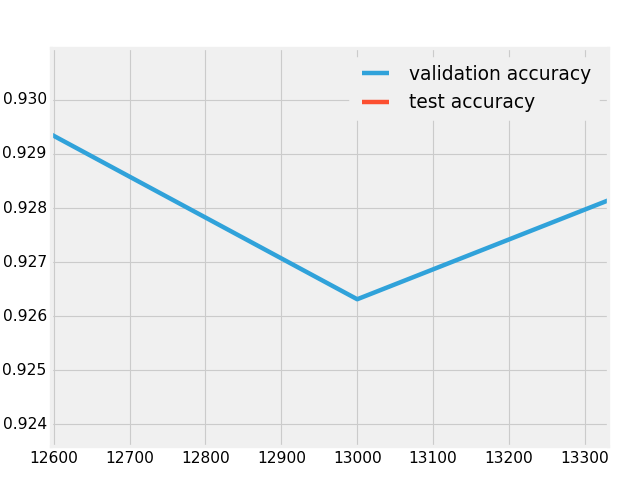

In [11]:
plt.figure(2)
validation_accuracy = np.array(mtd["validation_accuracy"])
plt.plot(validation_accuracy[:, 0], validation_accuracy[:, 1], label="validation accuracy")

test_accuracy = np.copy(validation_accuracy)
test_accuracy[:, 1] = mtd["testing_accuracy"]
plt.plot(test_accuracy[:, 0], test_accuracy[:, 1], label="test accuracy")
plt.legend()